## Termodinamica

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import*
t=Symbol('t')

## Lo primero que haremos sera definir las variables

In [60]:
#condiciones del alambre y del sistema
Area_=0.01
L_longitud=0.30
k=389.6
moles=1
cv=(3/2)*8.31
Npoints_=50
C_=(k*Area_)/(moles*cv*L_longitud)

T_iniciales=[400,200]
intervalo_=np.linspace(0,5,Npoints)

In [39]:
#Ahora definimos nuestras ecuaciones diferenciales

Fo=lambda T1,T2,C:-C*(T1-T2)
F1=lambda T1,T2,C:C*(T1-T2)


In [52]:
def SuperEuler(Fo,F1,T,intervalo,Npoints,C):
    
    pasos=(intervalo[-1]-intervalo[0])/(len(intervalo)-1)
    
    
    T_1=np.zeros(Npoints)
    T_2=np.zeros(Npoints)
    
    #Anadimos nuestras condiciones inciales a los arrays de temperaturas
    
    T_1[0]=T[0]
    T_2[0]=T[1]
    
    #definimos de tamaño 2 ya que son dos las ecuaciones diferenciales a solucionar 
    k1=np.zeros(2)
    k2=np.zeros(2)
    
    
    for ken in range(1,len(intervalo_)):
        
        k1[0]=Fo(T_1[ken-1],T_2[ken-1],C)
        k1[1]=F1(T_1[ken-1],T_2[ken-1],C)
        
        k2[0]=Fo(T_1[ken-1]+pasos*k1[0],T_2[ken-1]+pasos*k1[1],C)
        k2[1]=F1(T_1[ken-1]+pasos*k1[0],T_2[ken-1]+pasos*k1[1],C)
        
        T_1[ken]=T_1[ken-1]+ (1/2)*pasos*(k1[0]+k2[0])
        T_2[ken]=T_2[ken-1]+ (1/2)*pasos*(k1[1]+k2[1])
        
    return T_1,T_2

    

In [67]:
arrTemp_1,arrTemp_2=SuperEuler(Fo,F1,T_iniciales,intervalo_,Npoints,C_)

In [83]:
#Aqui definimos la soluciones exactas del sistema de ecuaciones
fun_T2=lambda t ,C:300-100*np.e**(-2*C*t)
y_2=fun_T2(pasos,C_)
fun_T1=lambda t ,C:100*np.e**(-2*C*t)+300
y_1=fun_T1(pasos,C_)

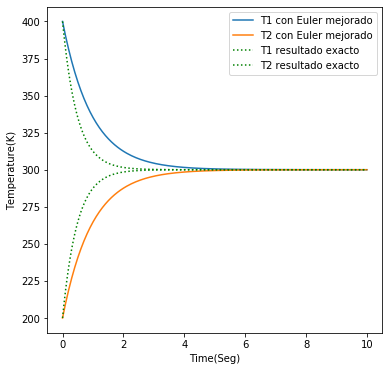

In [88]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.plot(pasos,arrTemp_1,label="T1 con Euler mejorado")
ax.plot(pasos,arrTemp_2,label="T2 con Euler mejorado")
ax.plot(pasos,y_1,"g:",label="T1 resultado exacto")
ax.plot(pasos,y_2,"g:",label="T2 resultado exacto")
plt.xlabel("Time(Seg)")
plt.ylabel("Temperature(K)")
plt.legend()


## Limite termodinamico de ambas variables

In [95]:
limit(300+100*np.e**(-2*C_*t),t,oo)

300

In [97]:
limit(-100*np.e**(-2*C_*t)+300,t,oo)

300